Iteration 0 Best 17.2785716122 Mean 21.100954563 Median 21.1963220804 Worst 21.6973459966
Iteration 50 Best 8.41299927283 Mean 10.3996930624 Median 10.4190592686 Worst 11.9275756468
Iteration 100 Best 4.23743885952 Mean 4.77299751444 Median 4.80127389859 Worst 4.97657568321
Iteration 150 Best 3.40005965629 Mean 3.40005965629 Median 3.40005965629 Worst 3.40005965629
Iteration 200 Best 3.40005965629 Mean 3.40005965629 Median 3.40005965629 Worst 3.40005965629
Iteration 250 Best 3.40005965629 Mean 3.40005965629 Median 3.40005965629 Worst 3.40005965629
Iteration 300 Best 3.40005965629 Mean 3.40005965629 Median 3.40005965629 Worst 3.40005965629
Iteration 350 Best 3.40005965629 Mean 3.40005965629 Median 3.40005965629 Worst 3.40005965629
Iteration 400 Best 3.40005965629 Mean 3.40005965629 Median 3.40005965629 Worst 3.40005965629
Iteration 450 Best 3.40005965629 Mean 3.40005965629 Median 3.40005965629 Worst 3.40005965629
Iteration 500 Best 3.40005965629 Mean 3.40005965629 Median 3.40005965629 W

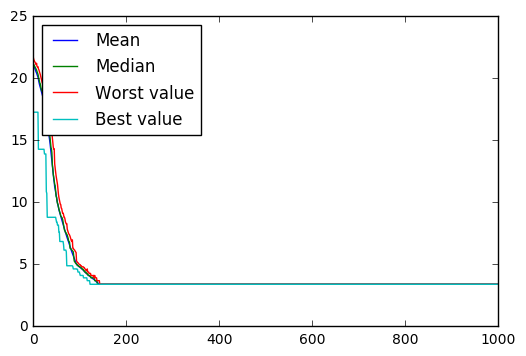

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import evolutionary.genetic_algorithms.initializations as initialization
import evolutionary.genetic_algorithms.selections as selection
import evolutionary.genetic_algorithms.mutations as mutation
import evolutionary.genetic_algorithms.crossovers as crossover

import evolutionary.optim_functions as functions
from evolutionary import Population

# Initalize vars
n_dimensions = 10
n_population = 100
n_iterations = 1000
lower = -32
upper = 32

# Log results var
mean = np.array([])
median = np.array([])
worst = np.array([])
best = np.array([])

# Define the fitness function
fitness_function = functions.Ackley().evaluate

# Create the class Population and initialize its chromosomes
population = Population(chromosomes=initialization.uniform(n_population, lower, upper, n_dimensions))


# Iterate simulating the evolutionary process
for i in range(n_iterations):
    # Apply the function in each row to get the array of fitness
    fitness = fitness_function(population.chromosomes)
    
    # Log the values after the iteration  
    mean = np.append(mean, np.mean(fitness))
    median = np.append(median, np.median(fitness))
    worst = np.append(worst, np.max(fitness))
    best = np.append(best, np.min(fitness))
    
    if i%50 == 0:
        print "Iteration", i, "Best", best[i], "Mean", mean[i], "Median", median[i], "Worst", worst[i]
    
    # Do the evolutionary process: selection -> crossover -> mutation -> 
    parents = selection.tournament(population.chromosomes, fitness, 5, 2, iterations=5 ,minimize=True)
    children = crossover.two_point(parents, 1)
    children = mutation.pos_swap(children, 0.8)#, upper, lower, i, n_iterations)
    population.chromosomes = selection.parent_replace(population.chromosomes, fitness, children)

if i > 0:
    x = np.arange(0, n_iterations)
    plt.plot(x, mean)
    plt.plot(x, median)
    plt.plot(x, worst,)
    plt.plot(x, best)
    plt.legend(['Mean', 'Median', 'Worst value', 'Best value'], loc='upper left')

    plt.show()

In [ ]:
import evolutionary.genetic_algorithms.crossovers as crossover
import numpy as np
parents = np.array([[1,2,3,4], [2,3,4,5], [3,2,1,5],[4,5,3,2],[5,3,1,2]])

crossover.one_point_permutation(parents, 1)